# Setup

In [4]:
# General libraries 
from datetime import date
from datetime import *
import pandas as pd
import numpy as np
import warnings
import logging
import mlflow
import sys
import os

# Plots
from matplotlib.offsetbox import TextArea, AnnotationBbox
import matplotlib.pyplot as plt
import networkx as nx

# Stats
from scipy.stats import norm

# LP
import pulp

# Directory

In [1]:
# Set cd to parent directory
import os
os.chdir("/Users/ignasipascual/Documents/GitHub/Optimizer")
cwd = os.getcwd()
print("Current Working Directory:", cwd)

Current Working Directory: /Users/ignasipascual/Documents/GitHub/Optimizator


# Assets

In [ ]:
# Load assets
from utils.optimizer import Optimizer
from utils.plotter import Plotter

# Parameters

In [ ]:
# Set random seed
np.random.seed(42)

# Safety stock
service_level=0.95
method='z_score'

# Load data

In [ ]:
# Write csv
sc_data_lead_times.to_csv('data/simulated_data.csv', index=False)

# Show
sc_data_lead_times.head()

# Start optimizator

In [ ]:
# Initialize optimizator
opt = Optimizator()

# Show
opt

## Safety stock

In [ ]:
# Calculate safety stock
sc_data_policy = sim.create_safety_stock(service_level, method)

# Show
sc_data_policy.head()

plant,warehouse,market,product,week,supply,sell_in,inventory,lead_time,safety_stock
plant_1,warehouse_1,market_1,product_1,202501,225.0,126.0,1099.0,2,75.16
plant_1,warehouse_1,market_1,product_1,202502,193.0,224.0,1068.0,2,75.16
plant_1,warehouse_1,market_1,product_1,202503,232.0,149.0,1151.0,2,75.16
plant_1,warehouse_1,market_1,product_1,202504,276.0,108.0,1319.0,2,75.16
plant_1,warehouse_1,market_1,product_1,202505,188.0,183.0,1324.0,2,75.16
plant_1,warehouse_1,market_1,product_1,202506,188.0,101.0,1411.0,2,75.16
plant_1,warehouse_1,market_1,product_1,202507,279.0,158.0,1532.0,2,75.16
plant_1,warehouse_1,market_1,product_1,202508,238.0,72.0,1698.0,2,75.16
plant_1,warehouse_1,market_1,product_1,202509,177.0,97.0,1778.0,2,75.16
plant_1,warehouse_1,market_1,product_1,202510,227.0,158.0,1847.0,2,75.16


In [ ]:
# Group data by product and warehouse and calculate standard deviation and mean of sell_in
checks = (
    sc_data_policy.groupby(['product', 'warehouse'])['sell_in']
    .agg(['std', 'mean'])
    .rename(columns={'std': 'std_sell_in', 'mean': 'mean_sell_in'})
    .reset_index()
)

# Show
checks

,product,warehouse,std_sell_in,mean_sell_in
0,product_1,warehouse_1,45.692693,137.6
1,product_1,warehouse_2,32.831147,148.9


## Summary

In [ ]:
# Get summary
summary = sim.get_summary()

# Show
summary

inventory                          ... safety_stock                   
                  min     max    mean     std  ...          min    max   mean  std
warehouse                                      ...                                
warehouse_1    1068.0  1847.0  1422.7  282.66  ...        75.16  75.16  75.16  0.0
warehouse_2     997.0  1520.0  1266.4  182.01  ...        85.11  85.11  85.11  0.0

[2 rows x 20 columns]

# Plot network

In [ ]:
# Initialize the plotter
plotter = Plotter(sc_data_policy)

# Show
plotter

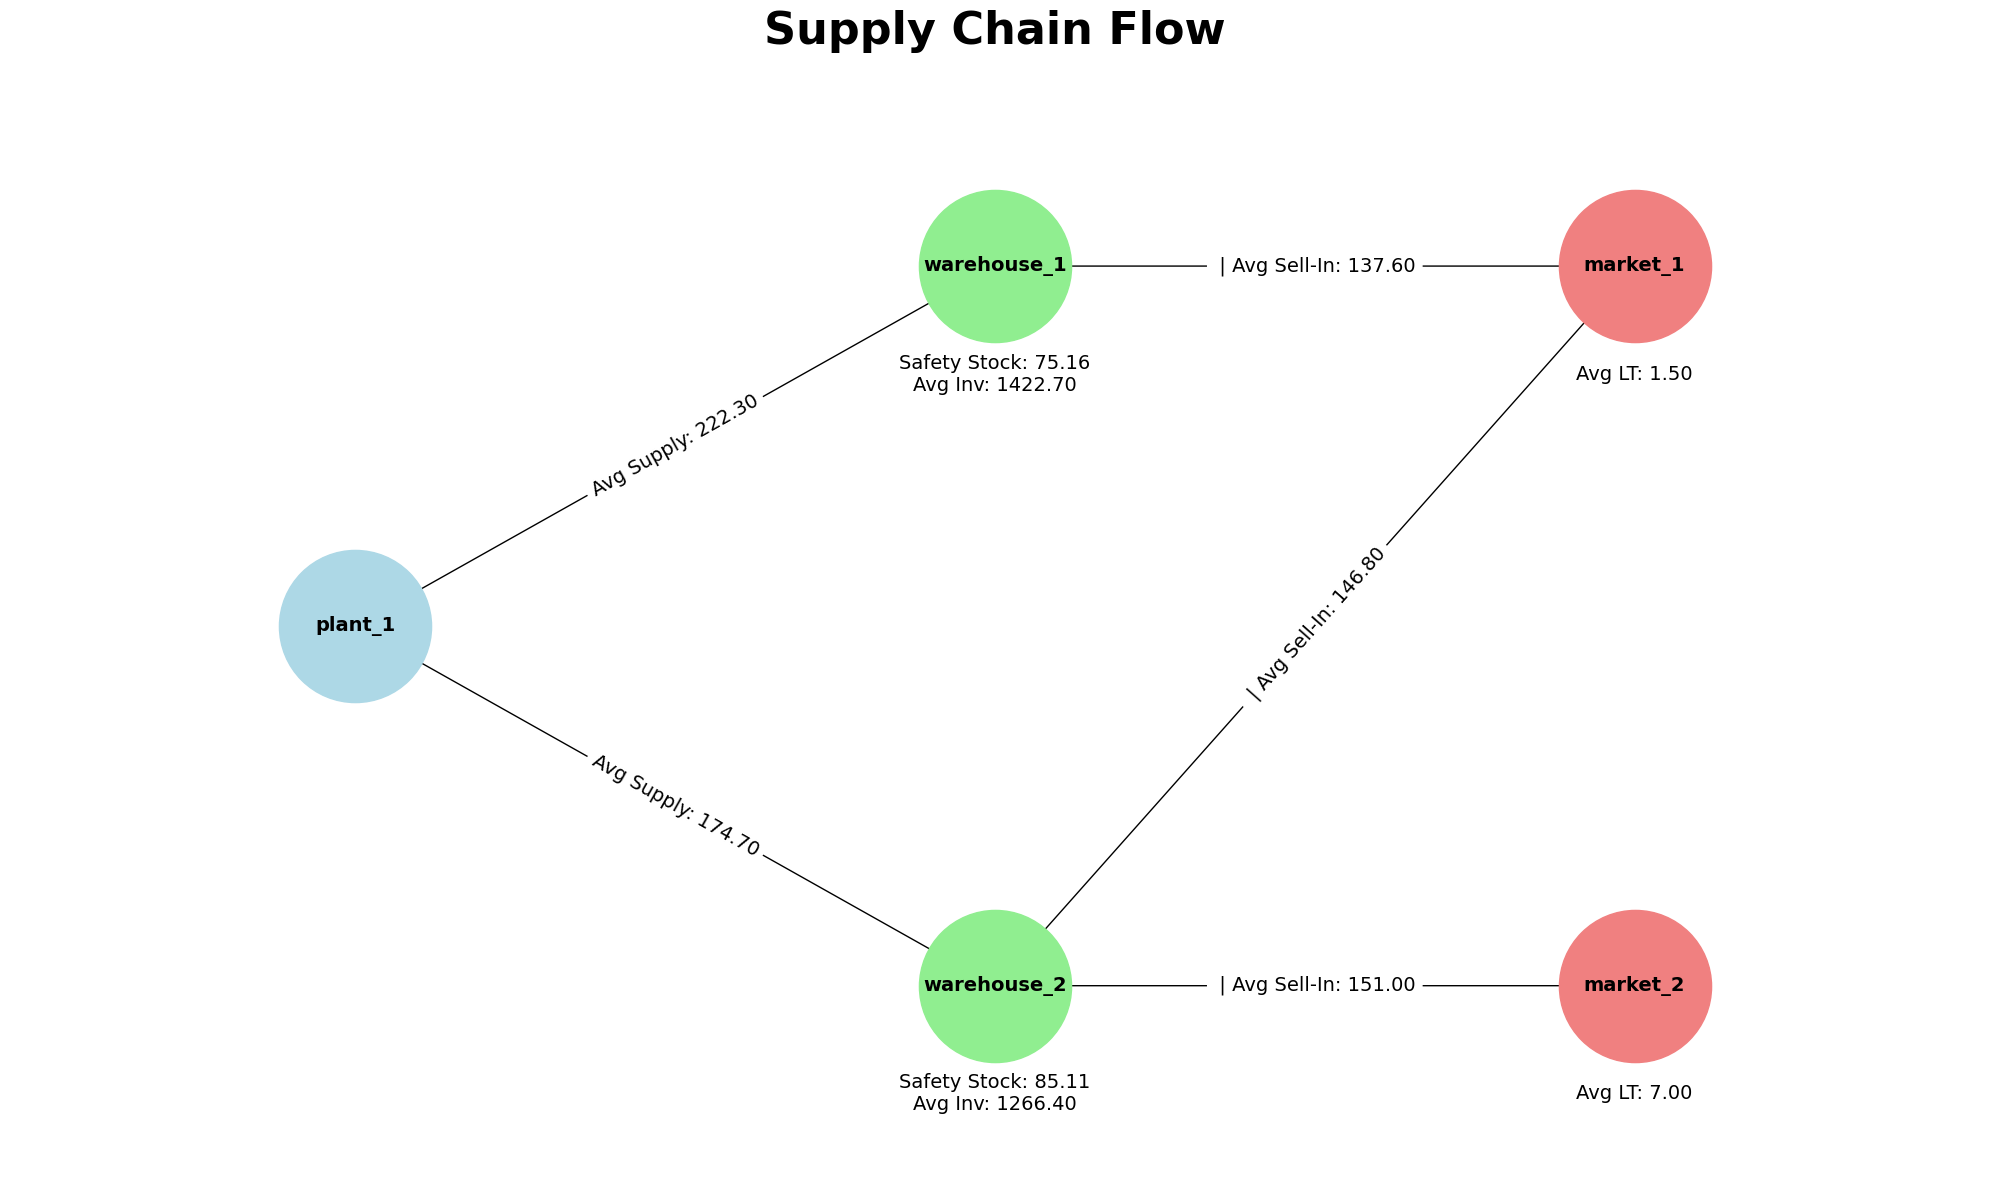

In [ ]:
# Plot the network
plotter.plot_multiple_networks()